# Prosper Loan Data
## by Kuo, Yen-Chen

## Preliminary Wrangling

> The document is mainly to explore the detail of prosper loan data

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Take a glimpse of the data
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Check the if there's data missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# See what the statistic shows
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# See if there's any data duplicated
sum(df.duplicated())

0

In [19]:
# filter out those prosper scores are not null
df_copy= df.dropna(axis = 0, subset = ['ProsperScore'], inplace = True)

In [81]:
# Extract those columns we need for later use
columns = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperScore', 'Occupation']
df_copy = df[columns]
df_copy.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperScore,Occupation
1,10000,0.12016,6125.000000,36,7.0,Professional
3,10000,0.12528,2875.000000,36,9.0,Skilled Labor
4,15000,0.24614,9583.333333,36,4.0,Executive
5,15000,0.15425,8333.333333,60,10.0,Professional
6,3000,0.31032,2083.333333,36,2.0,Sales - Retail


In [82]:
# Check the data are all useful
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LoanOriginalAmount   84853 non-null  int64  
 1   BorrowerAPR          84853 non-null  float64
 2   StatedMonthlyIncome  84853 non-null  float64
 3   Term                 84853 non-null  int64  
 4   ProsperScore         84853 non-null  float64
 5   Occupation           83520 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 7.0+ MB


In [83]:
# Check the statistic situation
df_copy.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperScore
count,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000
mean,9083.440515,0.226658,5.931175e+03,42.486135,5.950067
std,6287.860058,0.079916,8.239944e+03,11.640346,2.376501
min,1000.000000,0.045830,0.000000e+00,12.000000,1.000000
25%,4000.000000,0.163280,3.434000e+03,36.000000,4.000000
50%,7500.000000,0.219450,5.000000e+03,36.000000,6.000000
75%,13500.000000,0.292540,7.083333e+03,60.000000,8.000000
max,35000.000000,0.423950,1.750003e+06,60.000000,11.000000


### What is the structure of your dataset?

> There are 113937 rows and 81 columns originally.

### What is/are the main feature(s) of interest in your dataset?

> This exploration report will be focused on the borrow APR feature and its correlation to other factors.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I would expect to find that the total loan ammount will have negative effect on borrow APR, other factors such as state monthly income, term, and porsper score would have effects on borrow APR as well.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### First, look into the main variable which is the borrower APR

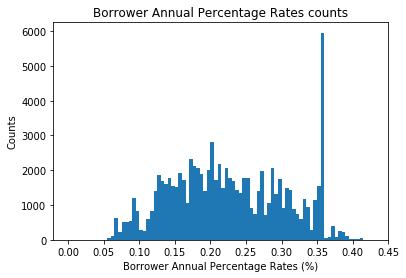

In [55]:
bins = np.arange(0, df_copy['BorrowerAPR'].max(), 0.005)
plt.hist(data = df_copy, x = 'BorrowerAPR', bins = bins)
plt.title('Borrower Annual Percentage Rates counts')
plt.xlabel('Borrower Annual Percentage Rates (%)')
plt.ylabel('Counts')
plt.xticks(np.arange(0, df_copy['BorrowerAPR'].max()+0.05, 0.05))

We can see that its roughly normal distributed with a really high bin of the percentage around 0.35.

### See which prosper score borrowers received the most

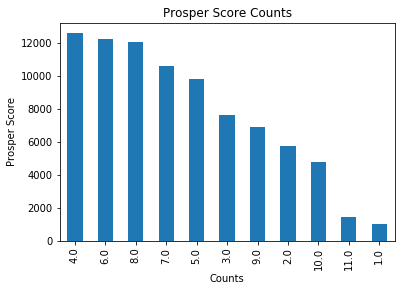

In [54]:
df_copy['ProsperScore'].value_counts().plot(kind='bar', align = 'center')
plt.title('Prosper Score Counts')
plt.xlabel('Counts')
plt.ylabel('Prosper Score')
plt.fontsize = 16
plt.figsize=(20,20)

We can tell that most borrowers have prosper score falls between 4 and 8

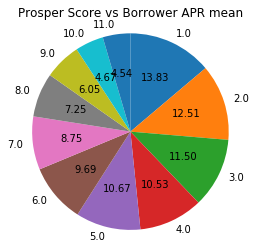

In [49]:
# Compare Prosper Score and Borrower APR mean

prosper_score_mean = df_copy.groupby('ProsperScore').BorrowerAPR.mean()

plt.pie(prosper_score_mean, labels = prosper_score_mean.index, startangle = 90,
    counterclock = False, autopct='%1.2f')
plt.axis('square') 
plt.title('Prosper Score vs Borrower APR mean')

It seems like when we compare the porsper score with borrower APR mean, the lower the prosper score is the higher borrower annual percentage rate means gets higher. It makes sense cause the lower the prosper score menas the borrower is less trustworthy hense the risk is getting hight, so need a higher APR.

### See the distribution of top 5 borrowers' occupation

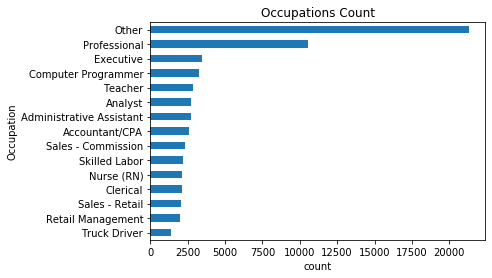

In [41]:
df_copy['Occupation'].value_counts()[14::-1].plot(kind='barh')
plt.title('Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 16
plt.figsize=(20,20)

We can tell that most pople don't have specific occupation shown, while the 'professionals' are significantly a large borrower group compare to the rest occupations.

### The distribution of the variable of stated monthly income

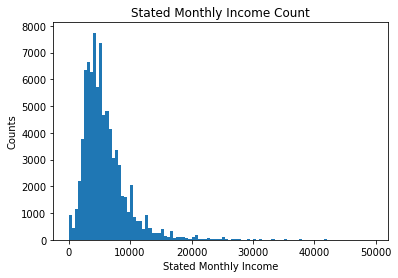

In [50]:
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = df_copy, x = 'StatedMonthlyIncome', bins=bins_smi)
plt.title('Stated Monthly Income Count')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Counts')
plt.fontsize = 16
plt.figsize=(20,20)

Here, we found that the stated monthly income of the borrower is right skewed, which means the lower their income is, they tend to need borrow money. But when their stated monthly income comes to nearly none, it's getting harder for them to borrow money successfully, so the number of borrower drops down rapidly from around group of those monthly income below 5000.

### The distribution of the amount of the loan

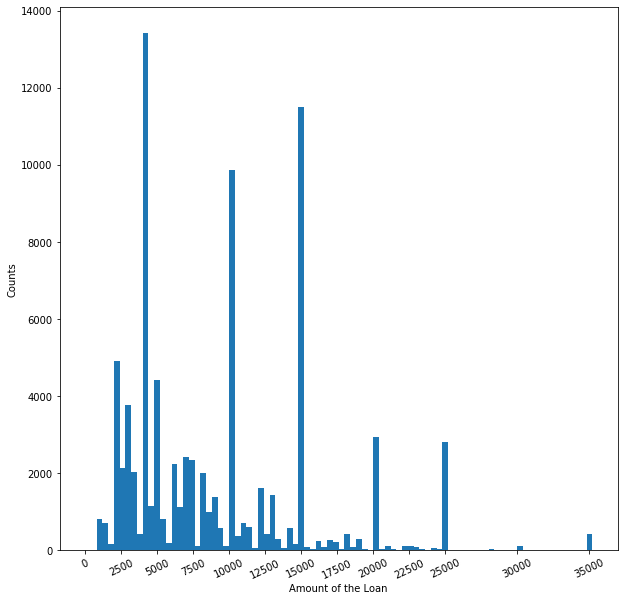

In [53]:
binsize = 400
bins = np.arange(0, df_copy.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[10, 10])
plt.hist(data = df_copy, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Amount of the Loan')
plt.ylabel('Counts')
plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000,30000,35000], rotation=25)
plt.show()

The amount of the loan is mostly between 2500 and 10000 while the peak is around 4000.

### The distribution of the term

Text(0.5, 1.0, 'Term')

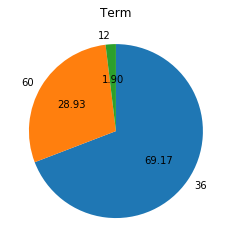

In [74]:
terms = df['Term'].value_counts()
plt.pie(terms, labels = terms.index, startangle = 90,
    counterclock = False, autopct='%1.2f')
plt.title('Term')

We can tell that around 70% of borrow term is 36 months.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did not find any unusual points hence I would not need to perfrom any trnasformations here.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I found that the loan amount is mostly between 2500 and 10000, while there's quite a large group of borrow amount of 15000. There should be some reasons.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Correlation Plot

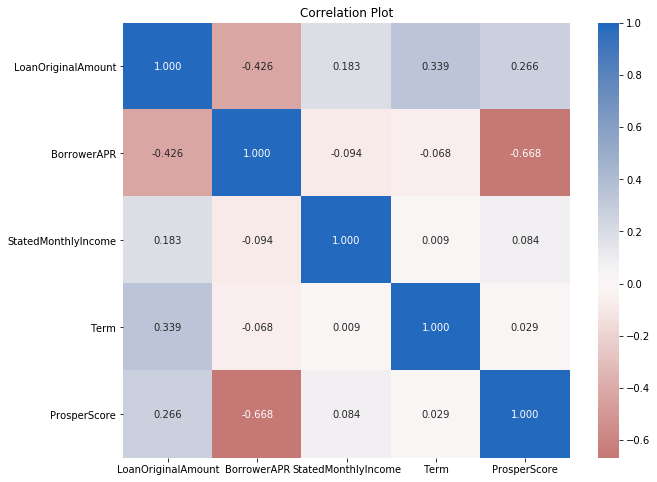

In [68]:
var_columns = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperScore']

plt.figure(figsize = [10, 8])
sb.heatmap(df_copy[var_columns].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

We can tell that the correlation between 'BorrowAPR' and 'ProsperScore' is the highest and the correlation between 'BorrowAPR' and 'LoanOriginalAmount' is worthy for us to take a look in it.

### Plot Matrix

Text(0.5, 1, 'Matrix Plot')

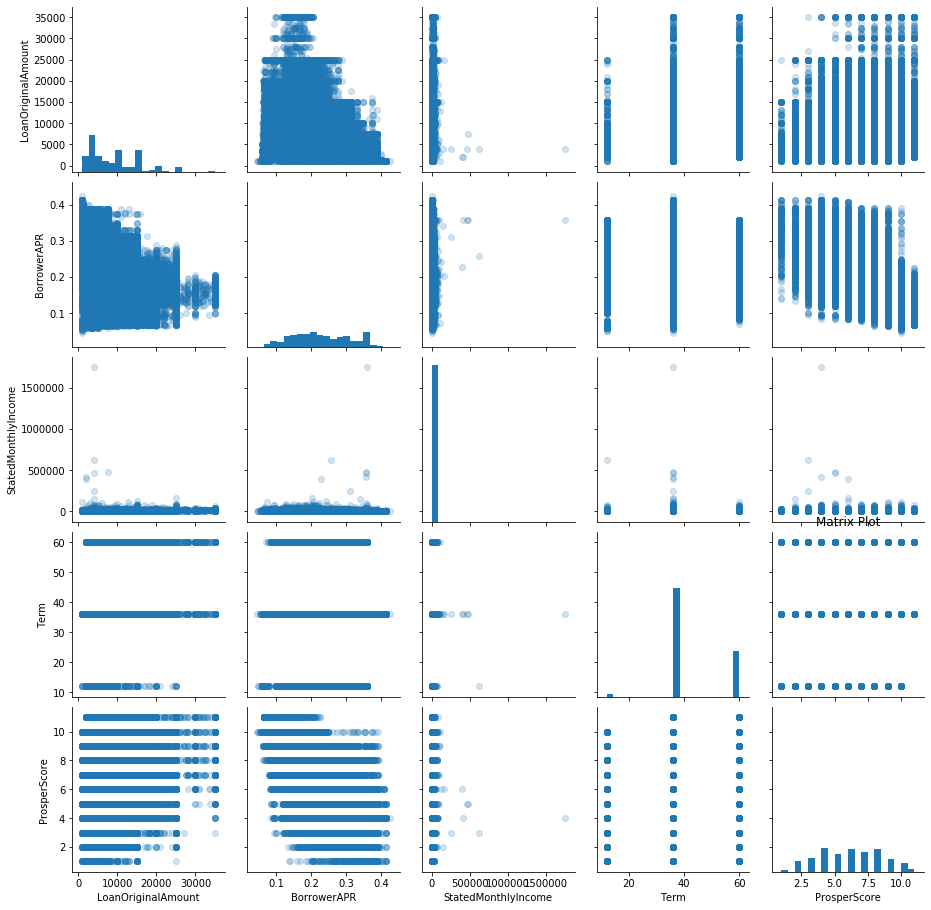

In [71]:
var_columns = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperScore']

g = sb.PairGrid(data = df_copy, vars = var_columns)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2)
plt.title('Matrix Plot')

Seems like we can't get much information here.

### Scatter and heat plot for comparing Prosper Score and Borrower APR. 

Text(0, 0.5, 'Prosper Score')

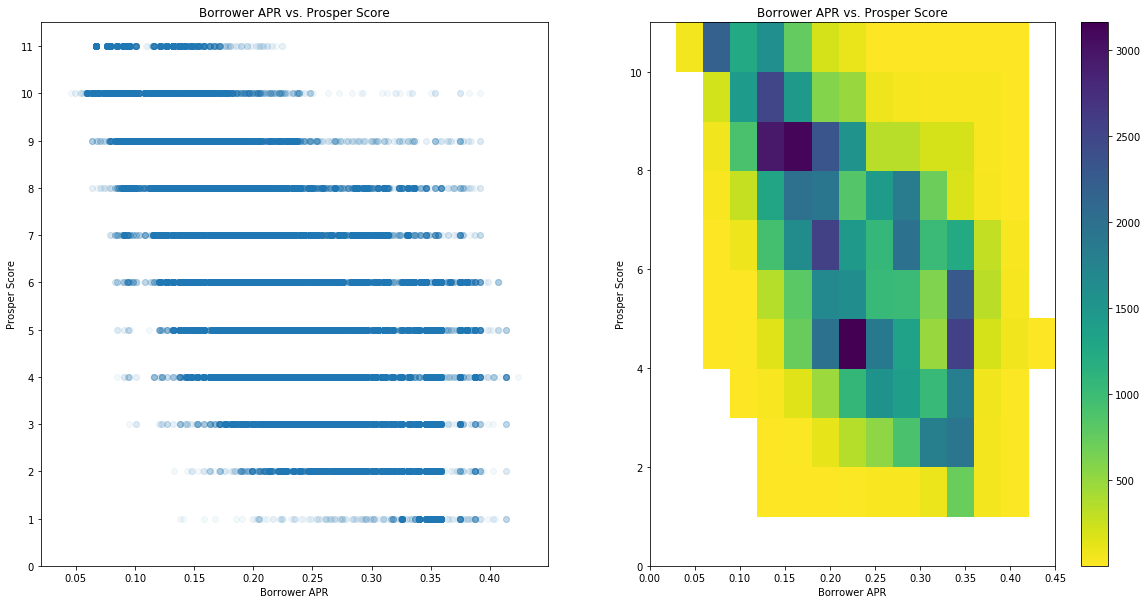

In [72]:
plt.figure(figsize = [20, 10]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_copy, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.05)
plt.yticks(np.arange(0, 12, 1))
plt.title('Borrower APR vs. Prosper Score')
plt.xlabel('Borrower APR')
plt.ylabel('Prosper Score')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_copy['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_copy['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_copy, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('Borrower APR vs. Prosper Score')
plt.xlabel('Borrower APR')
plt.ylabel('Prosper Score')

Borrower APR vs. Prosper Score: It shows that Borrower APR is negatively correlated to Prosper Score, and it make sense cause people with higher porsper score tend to be more reliable therefore given lower Borrower APR.

### Scatter and heat plot for comparing Borrow APR and Loan Original Amount

Text(0, 0.5, 'Loan Original Amount')

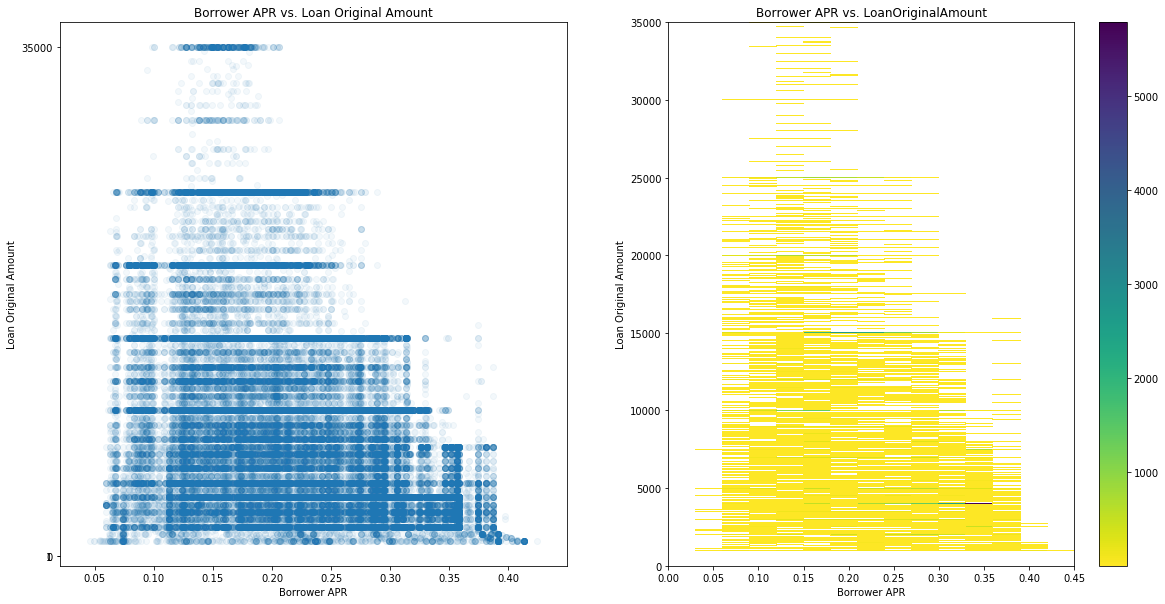

In [77]:
plt.figure(figsize = [20, 10]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_copy, x = 'BorrowerAPR', y = 'LoanOriginalAmount', alpha =  0.05)
plt.yticks((0, df_copy['LoanOriginalAmount'].max(), 1))
plt.title('Borrower APR vs. Loan Original Amount')
plt.xlabel('Borrower APR')
plt.ylabel('Loan Original Amount')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_copy['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_copy['LoanOriginalAmount'].max()+1, 1)
plt.hist2d(data = df_copy, x = 'BorrowerAPR', y = 'LoanOriginalAmount', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('Borrower APR vs. LoanOriginalAmount')
plt.xlabel('Borrower APR')
plt.ylabel('Loan Original Amount')

### Take a look of the relations between those categorical variables

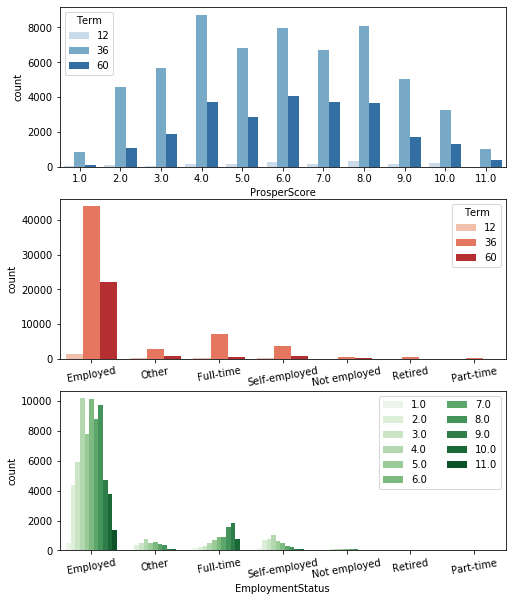

In [73]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper Score vs Term
plt.subplot(3, 1, 1)
sb.countplot(data = df_copy, x = 'ProsperScore', hue = 'Term', palette = 'Blues')

# subplot 2: Employment Status vs. Term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_copy, x = 'EmploymentStatus', hue = 'Term', palette = 'Reds')
plt.xticks(rotation=10)

# subplot 3: Prosper Score vs. Employment Status
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_copy, x = 'EmploymentStatus', hue = 'ProsperScore', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);


We can tell that no matter what the prosper score and the term are, the borrowers are mostly employed, which also makes sense cause that they are labeled with capacity to repay the loan.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section, correlation and matrix plots are helpful to preview all possibles variables related to borrower APR that we can try to analyze. Here we can find that the prosper score has the strongest relation to borrower APR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The borrower APR has negative and relatively stronger relations to variables of loan original amount and prosper score, while the borrower APR has positive and less stronger relations to variables of term and stated monthly income. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Porsper score effect on relationship of borrower APR and original loan amount

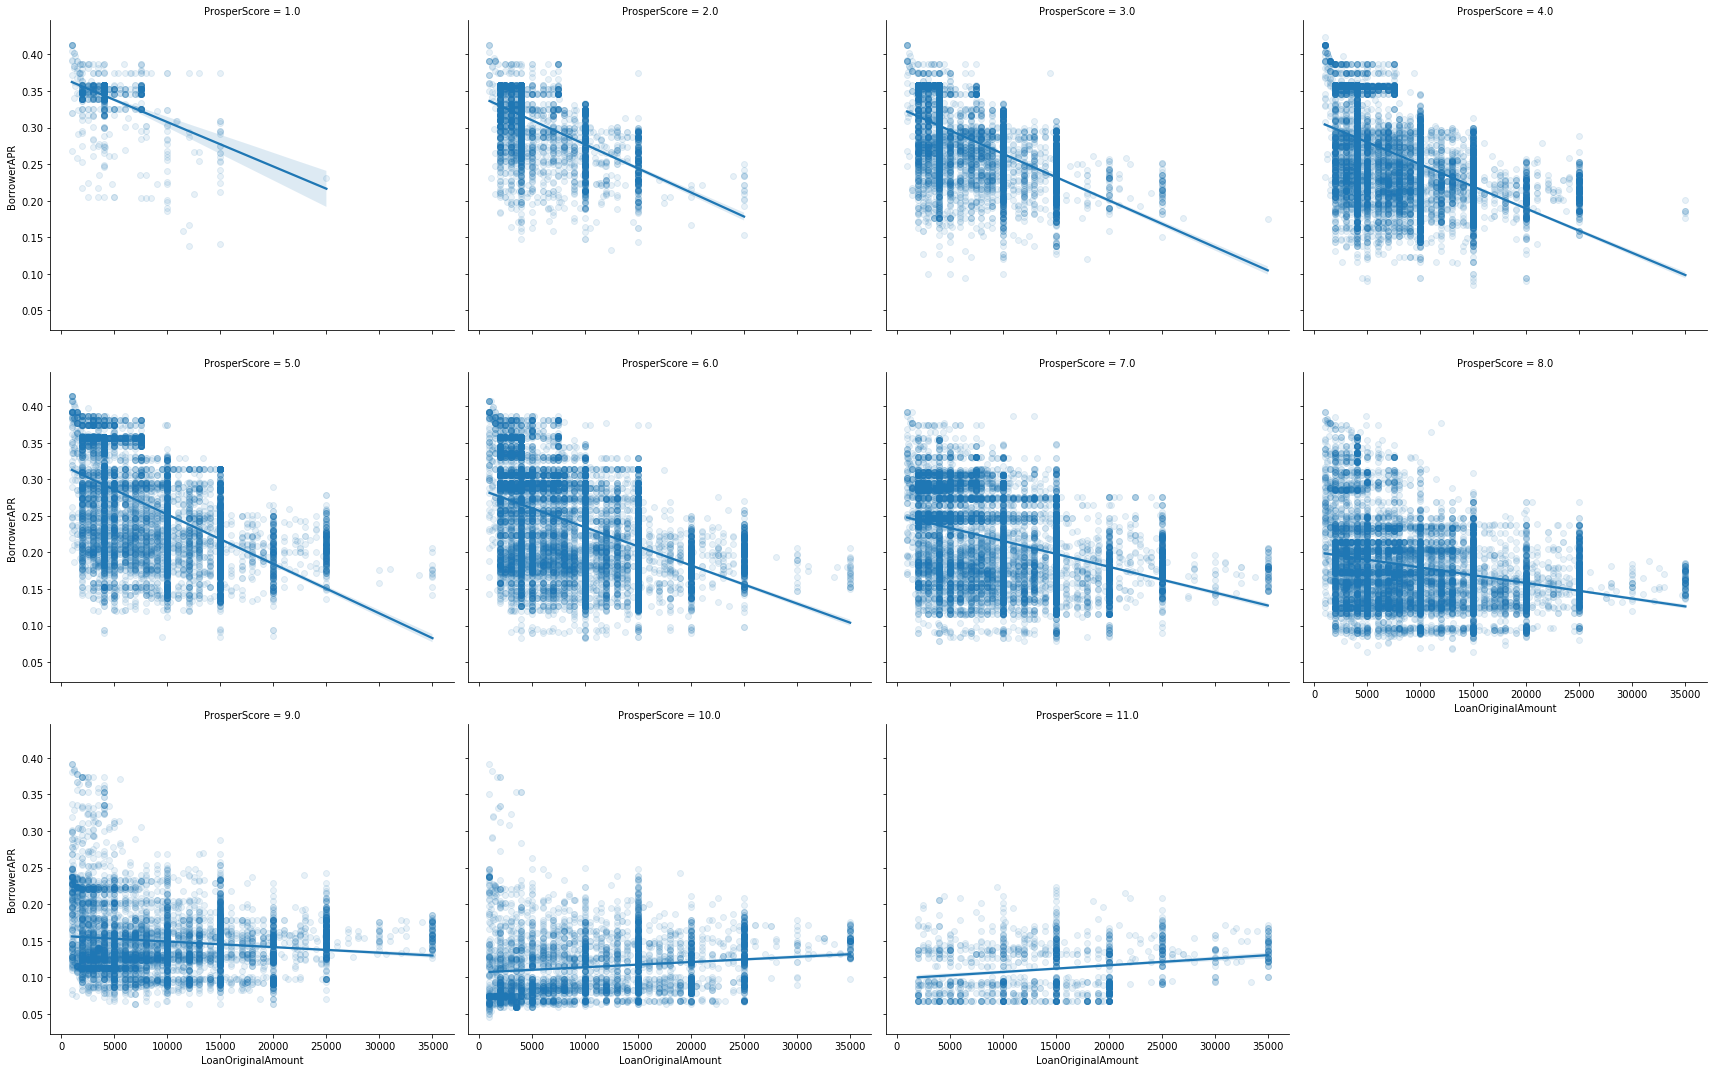

In [85]:
g=sb.FacetGrid(data=df_copy, aspect=1.2, height=5, col='ProsperScore', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We can find that with higher prosper score the relationship between borrower APR and loan original amount tend to be smaller and then get positive when score reach 10.

### Were there any interesting or surprising interactions between features?

> We can say that it's becuase with higher prosper score, it's more possible for them to get larger amount of loan with lower APR.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!